In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def write_to_submission_file(predicted_labels, out_file, train_num=891,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(train_num + 1,
                                                  train_num + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [3]:

train_df = pd.read_csv('C:/Users/d.savchenko/python/titanik/train.csv') 
test_df = pd.read_csv('C:/Users/d.savchenko/python/titanik/test.csv')
data = pd.read_csv('C:/Users/d.savchenko/python/titanik/train.csv') 

In [4]:
y = train_df['Survived']

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fortune, Mr. Charles Alexander",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_df[train_df['Survived']==1].describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,342.000000,342.0,342.000000,342,342,290.000000,342.000000,342.000000,342,342.000000,136,340
unique,NaN,NaN,NaN,342,2,NaN,NaN,NaN,260,NaN,101,3
top,NaN,NaN,NaN,"Coutts, Master. William Loch ""William""",female,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,233,NaN,NaN,NaN,5,NaN,4,217
mean,444.368421,1.0,1.950292,NaN,NaN,28.343690,0.473684,0.464912,NaN,48.395408,NaN,NaN
std,252.358840,0.0,0.863321,NaN,NaN,14.950952,0.708688,0.771712,NaN,66.596998,NaN,NaN
min,2.000000,1.0,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,250.750000,1.0,1.000000,NaN,NaN,19.000000,0.000000,0.000000,NaN,12.475000,NaN,NaN
50%,439.500000,1.0,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,26.000000,NaN,NaN
75%,651.500000,1.0,3.000000,NaN,NaN,36.000000,1.000000,1.000000,NaN,57.000000,NaN,NaN


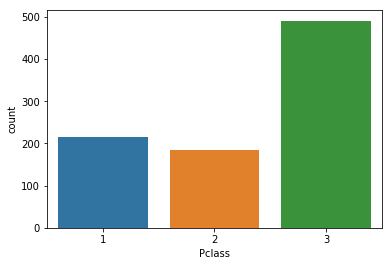

In [8]:
sns.countplot(train_df['Pclass'])

In [9]:
#sns.countplot(train_df[train_df['Survived']==1]['Pclass']);

In [10]:
#sns.countplot(train_df[train_df['Survived']==0]['Pclass']);

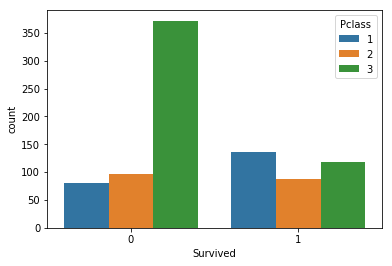

In [11]:
sns.countplot(x=train_df["Survived"], hue = 'Pclass', data=train_df);

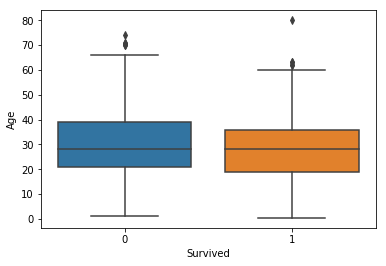

In [12]:
sns.boxplot(train_df["Survived"], train_df["Age"]);

In [13]:
#train_df[train_df['Pclass']==1]['Age'].fillna(train_df[train_df['Pclass']==1]['Age'].median(), inplace=True)
#train_df[train_df['Pclass']==2]['Age'].fillna(train_df[train_df['Pclass']==2]['Age'].median(), inplace=True)
#train_df[train_df['Pclass']==3]['Age'].fillna(train_df[train_df['Pclass']==3]['Age'].median(), inplace=True)

#test_df[test_df['Pclass']==1]['Age'].fillna(test_df[test_df['Pclass']==1]['Age'].median(), inplace=True)
#test_df[test_df['Pclass']==2]['Age'].fillna(test_df[test_df['Pclass']==2]['Age'].median(), inplace=True)
#test_df[test_df['Pclass']==3]['Age'].fillna(test_df[test_df['Pclass']==3]['Age'].median(), inplace=True)


train_df['Age'].fillna(data['Age'].median(), inplace=True)
test_df['Age'].fillna(data['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)



In [14]:
''' f_train['less_11'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [7, 8, 9, 10, 18, 19, 20, 21] else 0)
        df_train['11;11.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [1, 2, 11, 12, 17, 22] else 0)
        df_train['11.5;12.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [0, 3, 6, 13, 14, 15, 16, 23] else 0)
        df_train['more_12.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [4, 5] else 0)
        df_train.drop('hour_of_day', axis=1, inplace=True)
'''       
train_df['age<1'] = train_df['Age'].map(lambda hh: 1 if hh < 1 else 0)
train_df['age1-6'] = train_df['Age'].map(lambda hh: 1 if hh in range(1,7) else 0)
train_df['age7-15'] = train_df['Age'].map(lambda hh: 1 if hh in range(7, 16) else 0)
train_df['age16-30'] = train_df['Age'].map(lambda hh: 1 if hh in range(16, 31) else 0)
train_df['age31-36'] = train_df['Age'].map(lambda hh: 1 if hh in range(31, 37) else 0)
train_df['age37-59'] = train_df['Age'].map(lambda hh: 1 if hh in range(37, 60) else 0)
train_df['age60+'] = train_df['Age'].map(lambda hh: 1 if hh > 59 else 0)

test_df['age<1'] = train_df['Age'].map(lambda hh: 1 if hh < 1 else 0)
test_df['age1-6'] = train_df['Age'].map(lambda hh: 1 if hh in range(1,7) else 0)
test_df['age7-15'] = train_df['Age'].map(lambda hh: 1 if hh in range(7, 16) else 0)
test_df['age16-30'] = train_df['Age'].map(lambda hh: 1 if hh in range(16, 31) else 0)
test_df['age31-36'] = train_df['Age'].map(lambda hh: 1 if hh in range(31, 37) else 0)
test_df['age37-59'] = train_df['Age'].map(lambda hh: 1 if hh in range(37, 60) else 0)
test_df['age60+'] = train_df['Age'].map(lambda hh: 1 if hh > 59 else 0)

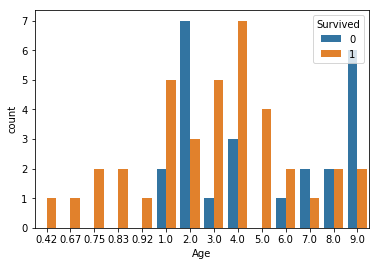

In [15]:
sns.countplot(x=train_df[train_df["Age"]<10]["Age"], hue = 'Survived', data=train_df);

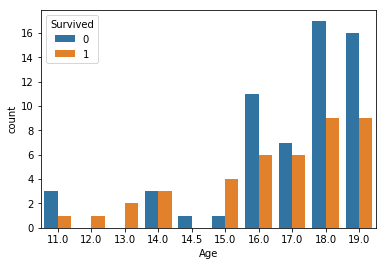

In [16]:
sns.countplot(x=train_df[(train_df["Age"]>10) & (train_df["Age"]<20) ]["Age"], hue = 'Survived', data=train_df);

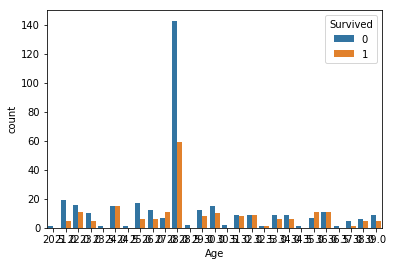

In [17]:
sns.countplot(x=train_df[(train_df["Age"]>20) & (train_df["Age"]<40) ]["Age"], hue = 'Survived', data=train_df);

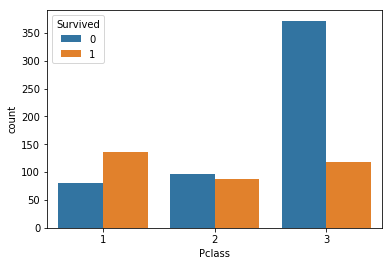

In [18]:
sns.countplot(x=train_df["Pclass"], hue = 'Survived', data=train_df);

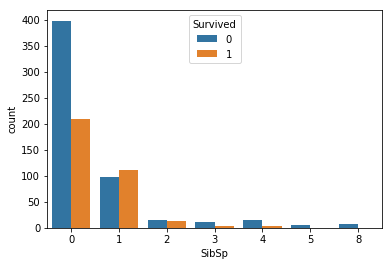

In [19]:
sns.countplot(x=train_df["SibSp"], hue = 'Survived', data=train_df);

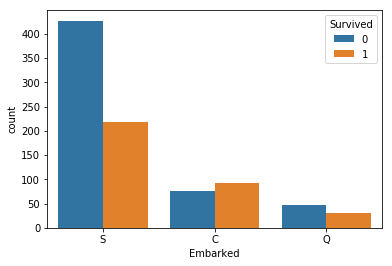

In [20]:
sns.countplot(x=train_df["Embarked"], hue = 'Survived', data=train_df);

In [21]:
train_df['SibSp0'] = train_df['SibSp'].map(lambda hh: 1 if hh == 0 else 0)
train_df['SibSp1-2'] = train_df['SibSp'].map(lambda hh: 1 if hh in [1, 2] else 0)
train_df['SibSp3+'] = train_df['SibSp'].map(lambda hh: 1 if hh > 2 else 0)

train_df['Fare1stClass'] = train_df['Fare'].map(lambda hh: 1 if hh > 73.6 else 0)
train_df['Fare300-60'] = train_df['Fare'].map(lambda hh: 1 if (hh > 30) & (hh < 60) else 0)
train_df['Fare300-61'] = train_df['Fare'].map(lambda hh: 1 if hh in range(30, 61) else 0)

test_df['SibSp0'] = train_df['SibSp'].map(lambda hh: 1 if hh == 0 else 0)
test_df['SibSp1-2'] = train_df['SibSp'].map(lambda hh: 1 if hh in [1, 2] else 0)
test_df['SibSp3+'] = train_df['SibSp'].map(lambda hh: 1 if hh > 2 else 0)

test_df['Fare1stClass'] = train_df['Fare'].map(lambda hh: 1 if hh > 73.6 else 0)
test_df['Fare300-60'] = train_df['Fare'].map(lambda hh: 1 if (hh > 30) & (hh < 60) else 0)
test_df['Fare300-61'] = train_df['Fare'].map(lambda hh: 1 if hh in range(30, 61) else 0)

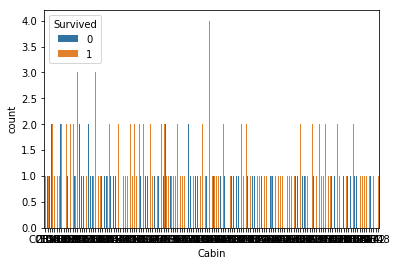

In [22]:
sns.countplot(x=train_df["Cabin"], hue = 'Survived', data=train_df);

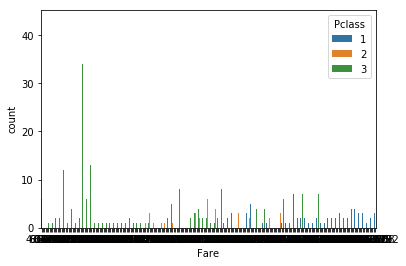

In [23]:
sns.countplot(x=train_df["Fare"], hue = 'Pclass', data=train_df);

In [24]:
train_df[train_df['Pclass']==1].describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age16-30,age31-36,age37-59,age60+,SibSp0,SibSp1-2,SibSp3+,Fare1stClass,Fare300-60,Fare300-61
count,216.000000,216.000000,216.0,216,216,216.000000,216.000000,216.000000,216,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
unique,NaN,NaN,NaN,216,2,NaN,NaN,NaN,147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Fortune, Mr. Charles Alexander",male,NaN,NaN,NaN,19950,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,122,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,461.597222,0.629630,1.0,NaN,NaN,36.812130,0.416667,0.356481,NaN,84.154687,...,0.393519,0.138889,0.356481,0.078704,0.634259,0.351852,0.013889,0.449074,0.282407,0.097222
std,246.737616,0.484026,0.0,NaN,NaN,14.182103,0.611898,0.693997,NaN,78.380373,...,0.489665,0.346634,0.480072,0.269901,0.482756,0.478657,0.117302,0.498555,0.451216,0.296948
min,2.000000,0.000000,1.0,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,NaN,NaN,28.000000,0.000000,0.000000,NaN,30.923950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.000000,1.000000,1.0,NaN,NaN,35.000000,0.000000,0.000000,NaN,60.287500,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,670.500000,1.000000,1.0,NaN,NaN,47.250000,1.000000,0.000000,NaN,93.500000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000


In [25]:
train_df[train_df['Pclass']==2].describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age16-30,age31-36,age37-59,age60+,SibSp0,SibSp1-2,SibSp3+,Fare1stClass,Fare300-60,Fare300-61
count,184.000000,184.000000,184.0,184,184,184.000000,184.000000,184.000000,184,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000
unique,NaN,NaN,NaN,184,2,NaN,NaN,NaN,140,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,NaN,NaN,S.O.C. 14879,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,108,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,445.956522,0.472826,2.0,NaN,NaN,29.765380,0.402174,0.380435,NaN,20.662183,...,0.478261,0.173913,0.206522,0.021739,0.652174,0.342391,0.005435,0.0,0.092391,0.043478
std,250.852161,0.500623,0.0,NaN,NaN,13.581096,0.601633,0.690963,NaN,13.417399,...,0.500890,0.380069,0.405914,0.146228,0.477580,0.475804,0.073721,0.0,0.290368,0.204488
min,10.000000,0.000000,2.0,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,234.500000,0.000000,2.0,NaN,NaN,23.000000,0.000000,0.000000,NaN,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,435.500000,0.000000,2.0,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,668.000000,1.000000,2.0,NaN,NaN,36.000000,1.000000,1.000000,NaN,26.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000


In [26]:
train_df[train_df['Pclass']==3].describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age16-30,age31-36,age37-59,age60+,SibSp0,SibSp1-2,SibSp3+,Fare1stClass,Fare300-60,Fare300-61
count,491.000000,491.000000,491.0,491,491,491.000000,491.000000,491.000000,491,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0,491.000000,491.0
unique,NaN,NaN,NaN,491,2,NaN,NaN,NaN,394,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Strandberg, Miss. Ida Sofia",male,NaN,NaN,NaN,CA. 2343,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,347,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,439.154786,0.242363,3.0,NaN,NaN,25.932627,0.615071,0.393075,NaN,13.675550,...,0.661914,0.087576,0.097760,0.010183,0.714868,0.199593,0.085540,0.0,0.069246,0.0
std,264.441453,0.428949,0.0,NaN,NaN,10.697676,1.374883,0.888861,NaN,11.778142,...,0.473540,0.282966,0.297292,0.100500,0.451938,0.400102,0.279968,0.0,0.254132,0.0
min,1.000000,0.000000,3.0,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,200.000000,0.000000,3.0,NaN,NaN,20.250000,0.000000,0.000000,NaN,7.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,432.000000,0.000000,3.0,NaN,NaN,28.000000,0.000000,0.000000,NaN,8.050000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,666.500000,0.000000,3.0,NaN,NaN,29.000000,1.000000,0.000000,NaN,15.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0


In [27]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age16-30,age31-36,age37-59,age60+,SibSp0,SibSp1-2,SibSp3+,Fare1stClass,Fare300-60,Fare300-61
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Fortune, Mr. Charles Alexander",male,NaN,NaN,NaN,CA. 2343,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,...,0.558923,0.117845,0.182941,0.029181,0.682379,0.265993,0.051627,0.108866,0.125701,0.032548
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,...,0.496795,0.322606,0.386835,0.168407,0.465813,0.442109,0.221398,0.311647,0.331699,0.177549
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
##feature engineering

In [29]:
''' f_train['less_11'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [7, 8, 9, 10, 18, 19, 20, 21] else 0)
        df_train['11;11.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [1, 2, 11, 12, 17, 22] else 0)
        df_train['11.5;12.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [0, 3, 6, 13, 14, 15, 16, 23] else 0)
        df_train['more_12.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [4, 5] else 0)
        df_train.drop('hour_of_day', axis=1, inplace=True)
'''       

" f_train['less_11'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [7, 8, 9, 10, 18, 19, 20, 21] else 0)\n        df_train['11;11.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [1, 2, 11, 12, 17, 22] else 0)\n        df_train['11.5;12.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [0, 3, 6, 13, 14, 15, 16, 23] else 0)\n        df_train['more_12.5'] = df_train['hour_of_day'].map(lambda hh: 1 if hh in [4, 5] else 0)\n        df_train.drop('hour_of_day', axis=1, inplace=True)\n"

In [30]:
sns.countplot

<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [31]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Pclass'], 
                                               prefix="PClass"),
                      pd.get_dummies(train_df['Sex'], prefix="Sex"),
                      pd.get_dummies(train_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(train_df['Parch'], prefix="Parch"),
                     pd.get_dummies(train_df['Embarked'], prefix="Embarked")],
                     axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Pclass'], 
                                             prefix="PClass"),
                      pd.get_dummies(test_df['Sex'], prefix="Sex"),
                      pd.get_dummies(test_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(test_df['Parch'], prefix="Parch"),
                    pd.get_dummies(test_df['Embarked'], prefix="Embarked")],
                     axis=1)

In [32]:
train_df.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
              axis=1, inplace=True)
test_df.drop([ 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
             axis=1, inplace=True)

In [33]:
train_df.shape, test_df.shape

((891, 39), (418, 39))

In [34]:
set(test_df.columns) - set(train_df.columns)

{'Parch_9'}

In [35]:
test_df.drop(['Parch_9'], axis=1, inplace=True)

In [36]:
train_df.head()


,Survived,Pclass,Age,Fare,age<1,age1-6,age7-15,age16-30,age31-36,age37-59,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,38.0,71.2833,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,7.9250,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,53.1000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,8.0500,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [37]:
#train_df['Age'], train_df["Pclass"]


In [38]:
data = pd.concat([data, pd.get_dummies(data['Pclass'], 
                                               prefix="PClass"),
                      pd.get_dummies(data['Sex'], prefix="Sex"),
                      pd.get_dummies(data['SibSp'], prefix="SibSp"),
                      pd.get_dummies(data['Parch'], prefix="Parch"),
                     pd.get_dummies(data['Embarked'], prefix="Embarked")],
                     axis=1)

data.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
              axis=1, inplace=True)

In [39]:
#X = data.drop('Survived', axis=1)
#y = data['Survived']
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [40]:
X.shape, y.shape

((891, 38), (891,))

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=17)

In [42]:
X_train.shape, X_valid.shape

((623, 38), (268, 38))

In [43]:
first_tree = DecisionTreeClassifier(max_depth=4,  random_state=17)

In [44]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.8378666666666665

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

first_xgboost = GradientBoostingClassifier(random_state=17)

In [46]:
np.mean(cross_val_score(first_xgboost, X_train, y_train, cv=5))

0.8330793650793652

In [47]:
xgboost_params = {'learning_rate': [0.001, 0.05, 0.01], 'n_estimators': [50, 100,200,300 ]}

In [48]:
xgboost_grid = GridSearchCV(first_xgboost, xgboost_params, cv=7, n_jobs=-1)

In [49]:
%%time
xgboost_grid.fit(X_train, y_train)

Wall time: 7.21 s


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.05, 0.01], 'n_estimators': [50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
xgboost_grid.best_score_, xgboost_grid.best_params_

(0.8378812199036918, {'learning_rate': 0.01, 'n_estimators': 300})

In [51]:
xgboost_grid.cv_results_

C:\Users\d.savchenko\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\d.savchenko\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\d.savchenko\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnin

{'mean_fit_time': array([0.06299588, 0.11166246, 0.23876149, 0.34092733, 0.05582595,
        0.10820273, 0.22973943, 0.37668426, 0.06727593, 0.12110482,
        0.25021819, 0.38096302]),
 'std_fit_time': array([0.0053945 , 0.00167099, 0.01648859, 0.01096544, 0.0015797 ,
        0.00611695, 0.03453243, 0.03915404, 0.01353043, 0.00393973,
        0.01721106, 0.02522468]),
 'mean_score_time': array([0.00142472, 0.00135779, 0.00143027, 0.00207751, 0.00128916,
        0.00242894, 0.00214124, 0.00156709, 0.00113869, 0.00142707,
        0.00242427, 0.00178426]),
 'std_score_time': array([0.00049624, 0.00044598, 0.00042028, 0.00049733, 0.00036086,
        0.00137113, 0.00125122, 0.00049352, 0.00034934, 0.00049011,
        0.00104649, 0.00036362]),
 'param_learning_rate': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.05, 0.05, 0.05, 0.05,
                    0.01, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, 

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
first_knn = KNeighborsClassifier()

In [54]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.6757724526369688

In [55]:
 ##настраиваем максимальную глубину

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[0.6, 0.7, 0.8, 0.9]}

In [58]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [59]:
%%time
tree_grid.fit(X_train, y_train)

Wall time: 418 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
tree_grid.best_score_, tree_grid.best_params_

(0.8394863563402889, {'max_depth': 4, 'max_features': 0.9})

In [61]:
from sklearn.linear_model import LogisticRegression 

In [62]:
first_logReg = LogisticRegression(random_state=17)

In [63]:
logReg_params = {'max_iter':[100, 50, 80,120,200,300,400,500,800,1000,2000]}

In [64]:
logReg_grid = GridSearchCV(first_logReg, logReg_params, cv=5, n_jobs=-1)

In [65]:
%%time
logReg_grid.fit(X_train, y_train)

Wall time: 232 ms


C:\Users\d.savchenko\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [100, 50, 80, 120, 200, 300, 400, 500, 800, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
logReg_grid.best_score_, logReg_grid.best_params_

(0.8282504012841091, {'max_iter': 100})

In [67]:
knn_params = {'n_neighbors': [1,2,3,4,7,9, 10, 11,12,13,14,15,16,17,18,20,30,50,70,90]}

In [68]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [69]:
%%time
knn_grid.fit(X_train, y_train)

Wall time: 2.89 s


C:\Users\d.savchenko\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 30, 50, 70, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 10}, 0.709470304975923)

In [71]:
xgboost_grid.best_estimator_ 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=17,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [72]:
xgboost_valid_pred = xgboost_grid.predict(X_valid)

In [73]:
print(xgboost_valid_pred)

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0]


In [74]:
xgboost_grid.score(X_valid, y_valid)

0.8022388059701493

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, xgboost_valid_pred)

0.8022388059701493

In [76]:
tree_valid_pred = tree_grid.predict(X_valid)

In [77]:
#tree_grid.score(X_valid, y_valid)

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, tree_valid_pred)

0.7611940298507462

In [79]:
logReg_valid_pred = logReg_grid.predict(X_valid)

In [80]:
logReg_grid.score(X_valid, y_valid)

0.7910447761194029

In [81]:
logReg_valid_pred = logReg_grid.predict(test_df)

In [82]:
xgboost_valid_pred = xgboost_grid.predict(test_df)

In [83]:
write_to_submission_file(xgboost_valid_pred, 'predict.csv')

In [84]:
test_df.shape

(418, 38)

In [85]:
X_valid.shape

(268, 38)